In [3]:
# Read in data
import pandas as pd
import numpy as np
import warnings

df1 = pd.read_csv('trainML.csv')
df2 = pd.read_csv('testML.csv')
df3 = pd.read_csv('trainRec.csv')
df4 = pd.read_csv('testRec.csv')

FileNotFoundError: [Errno 2] File b'trainML.csv' does not exist: b'trainML.csv'

## Part 1: Data Exploration

In [50]:
# discover the NAN/missing values in the dataframe
df1.isnull().sum()

# There are quite a few variables with around 150 missing variables, and considering
#  the size of our dataset, this corresponds to around 150/3808 or about 3.9% missing 
#  rows for these columns.  This relatively low percentage does not seem too concerning 
#  and did not lead me to remove any variables from the list of potential predictors
#  solely on the basis of having too many NAN entries.

# Note that since there are no NAN values for out target variable match, we 
#  do not need to remove any rows with regards to the match variable.  However,
#  I decided to remove all rows where any variable contains an NA value, shown 
#  several cells below when I did all the main modifications to my dataset.

gender        0
match         0
samerace      0
age_o        67
race_o       58
pf_o_att     58
pf_o_sin     58
pf_o_int     58
pf_o_fun     67
pf_o_amb     76
pf_o_sha     76
attr_o       97
sinc_o      138
intel_o     142
fun_o       161
met_o       168
age          67
field        58
race         58
imprace      58
imprelig     58
from         58
goal         58
date         58
go_out       58
career       68
career_c     68
sports       58
tvsports     58
exercise     58
           ... 
museums      58
art          58
hiking       58
gaming       58
clubbing     58
reading      58
tv           58
theater      58
movies       58
concerts     58
music        58
shopping     58
yoga         58
attr1_1      58
sinc1_1      58
intel1_1     58
fun1_1       67
amb1_1       76
attr3_1      58
sinc3_1      58
fun3_1       58
intel3_1     58
attr         97
sinc        138
intel       142
fun         161
met         168
iid           0
pid           0
shar1_1      76
Length: 61, dtype: int64

In [51]:
# Now lets check the number of unique values for each of the variables to 
#  determine if there are any variables for which all the rows have the same
#  value.  This will help us when we are deciding which variables to include
#  in our models because we can remove any such variables from our dataset.
for col in df1:
    print (col),
    print(len((df1[col].unique())))
    
# We can see that there are no variables that have only one value for all the rows.


gender
2
match
2
samerace
2
age_o
22
race_o
6
pf_o_att
32
pf_o_sin
31
pf_o_int
25
pf_o_fun
25
pf_o_amb
27
pf_o_sha
27
attr_o
17
sinc_o
14
intel_o
17
fun_o
17
met_o
5
age
22
field
153
race
6
imprace
11
imprelig
11
from
155
goal
7
date
8
go_out
8
career
202
career_c
16
sports
11
tvsports
11
exercise
11
dining
10
museums
10
art
11
hiking
11
gaming
12
clubbing
11
reading
11
tv
11
theater
11
movies
10
concerts
11
music
10
shopping
11
yoga
11
attr1_1
32
sinc1_1
31
intel1_1
25
fun1_1
25
amb1_1
27
attr3_1
10
sinc3_1
10
fun3_1
10
intel3_1
7
attr
17
sinc
14
intel
17
fun
17
met
6
iid
257
pid
257
shar1_1
28


In [52]:
# Let's also check the unique values themselves.
for col in df1:
    print (col),
    print ((df1[col].unique()))



gender
[0 1]
match
[0 1]
samerace
[0 1]
age_o
[29. 22. 27. 28. 26. 21. 25. 24. 23. nan 39. 30. 32. 34. 35. 18. 20. 19.
 33. 36. 31. 55.]
race_o
[ 3.  6.  1.  2. nan  4.]
pf_o_att
[20.   21.   50.   25.   60.   30.   17.   10.     nan  5.   15.   18.
 40.   19.   14.   80.   35.   24.   27.   23.    0.   16.67 22.    7.
 16.    6.67  2.   20.51 31.58 75.   12.    9.  ]
pf_o_sin
[25.   15.   17.   10.   20.    0.   18.     nan  7.   30.    8.    5.
 24.   32.   21.    3.   40.   16.   16.67 14.   35.   19.   13.   19.05
 47.   60.   12.   22.   14.53 10.53 26.  ]
pf_o_int
[15.   20.   22.   30.    0.   19.   18.     nan 25.   45.   17.   10.
 35.   21.   50.    5.   28.   16.67 40.   42.86 16.   24.79 15.79 27.
 23.  ]
pf_o_fun
[15.   20.   10.   30.     nan 25.   17.   19.   22.   23.   12.    5.
 18.   24.   35.   14.   16.67  9.52  8.   16.   17.09 21.05 27.   50.
  0.  ]
pf_o_amb
[53.    5.    8.    0.   15.   10.   17.     nan 13.    6.   20.   11.
  2.   18.   12.    4.    7.   25.

In [53]:
df1.columns

Index(['gender', 'match', 'samerace', 'age_o', 'race_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'met_o', 'age', 'field', 'race',
       'imprace', 'imprelig', 'from', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1', 'sinc3_1', 'fun3_1',
       'intel3_1', 'attr', 'sinc', 'intel', 'fun', 'met', 'iid', 'pid',
       'shar1_1'],
      dtype='object')

In [54]:
# View the number of columns/rows
df1.shape

(3808, 61)

In [55]:
# Print the data types.  We can see that there are three object variables, while the majority
#  are floats, with 5 int variables: 'pid', 'iid', 'gender', 'match', and 'samerace'.
#  I expain severall cells below why the object variables, 'pid', and 'iid'
#  can be removed from the dataset before using it to fit our models. 
#  I also changed the remaining int variables to floats in the cell below so that the dataset
#  would be easier to process by functions that we later use that require 
#  columns in a a pandas data frame to have the same type.

df1.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 61 columns):
gender      3808 non-null int64
match       3808 non-null int64
samerace    3808 non-null int64
age_o       3741 non-null float64
race_o      3750 non-null float64
pf_o_att    3750 non-null float64
pf_o_sin    3750 non-null float64
pf_o_int    3750 non-null float64
pf_o_fun    3741 non-null float64
pf_o_amb    3732 non-null float64
pf_o_sha    3732 non-null float64
attr_o      3711 non-null float64
sinc_o      3670 non-null float64
intel_o     3666 non-null float64
fun_o       3647 non-null float64
met_o       3640 non-null float64
age         3741 non-null float64
field       3750 non-null object
race        3750 non-null float64
imprace     3750 non-null float64
imprelig    3750 non-null float64
from        3750 non-null object
goal        3750 non-null float64
date        3750 non-null float64
go_out      3750 non-null float64
career      3740 non-null object
career_c    3740 n

In [56]:
df1['gender'] = pd.to_numeric(df1['gender'], downcast = 'float')
df1['match'] = pd.to_numeric(df1['match'], downcast = 'float')
df1['samerace'] = pd.to_numeric(df1['samerace'], downcast = 'float')

In [57]:
# Get a summary of the data
df1.describe()

# Looking at the summary, we can pull out a few important points.  The average age of the
#  participants was around 27, about 16.5% of participants found matches, and 
#  subjects had the highest bar for attractiveness out of all other characteristics when
#  it comes to finding a partner (mean of pf_o_att was the highest out of all the preference
#  variables at about 22.5).  After meeting their partners, on average, people rated
#  the intelligence of their partner as their partner's highest scoring characteristic, 
#  followed by sincerity (means of 7.4 and 7.2 respectively.)


,gender,match,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,...,fun3_1,intel3_1,attr,sinc,intel,fun,met,iid,pid,shar1_1
count,3808.000000,3808.000000,3808.000000,3741.000000,3750.000000,3750.000000,3750.000000,3750.000000,3741.000000,3732.000000,...,3750.000000,3750.000000,3711.000000,3670.000000,3666.000000,3647.000000,3640.000000,3808.000000,3808.000000,3732.000000
mean,0.500000,0.164916,0.344013,26.672815,2.885600,22.492333,17.740259,20.402589,17.191165,10.723025,...,7.671467,8.386667,6.274427,7.240736,7.421031,6.407595,0.553846,281.451943,281.451943,11.599033
std,0.500066,0.371149,0.475107,3.847338,1.287227,11.968602,7.567328,7.267267,6.083094,6.288042,...,1.581539,1.017758,1.955501,1.744989,1.509306,1.975880,0.879282,163.573517,163.573517,6.836312
min,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-28.000000
25%,0.000000,0.000000,0.000000,24.000000,2.000000,15.000000,15.000000,16.000000,14.000000,5.000000,...,7.000000,8.000000,5.000000,6.000000,7.000000,5.000000,0.000000,129.000000,129.000000,8.000000
50%,0.500000,0.000000,0.000000,26.000000,2.000000,20.000000,19.000000,20.000000,18.000000,10.000000,...,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,0.000000,288.000000,288.000000,10.000000
75%,1.000000,0.000000,1.000000,29.000000,4.000000,25.000000,20.000000,25.000000,20.000000,15.000000,...,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,2.000000,434.000000,434.000000,15.000000
max,1.000000,1.000000,1.000000,55.000000,6.000000,80.000000,60.000000,50.000000,50.000000,53.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,550.000000,550.000000,30.000000


In [58]:
# The paper on the speed dating study focused on gender differences, so I thought it
#  would be interesting to see if certain partner preferences differed by gender in 
#  the cells below:

# Did a certain gender have preference for a partner with higher 
#  intelligence?
gender_int_pref = pd.DataFrame(df1.groupby('gender')['pf_o_int'].mean())
gender_int_pref.head()

# We can see that the average preference for intelligence was not much different among
#  men and women.

,pf_o_int
gender,
0.0,19.605966
1.0,21.206897


In [59]:
# Did a certain gender have preference for a partner with higher 
#  ambition?
gender_amb_pref = pd.DataFrame(df1.groupby('gender')['pf_o_amb'].mean())
gender_amb_pref.head()

# We can see that women on average prefer partner's with a higher level of ambition.

,pf_o_amb
gender,
0.0,8.514609
1.0,12.931442


In [60]:
# Did a certain gender have preference for a partner with higher 
#  attractiveness?
gender_att_pref = pd.DataFrame(df1.groupby('gender')['pf_o_att'].mean())
gender_att_pref.head()

# As stated in the study, we can see that men on average want their partner to be much
#  more attractive than women do. 

,pf_o_att
gender,
0.0,27.743195
1.0,17.190820


In [61]:
# Let's look at the importance of having a partner of the same race for each of 
#  the different ethnicity groups.

afr = (df1['race']==1)
afr = df1[afr]
afr_race = afr[np.isfinite(afr['imprace'])]['imprace']
plt.hist(afr_race)
plt.title("Importance of race for African Americans")
plt.xlabel('Importance of Race')
plt.ylabel('Frequency')


NameError: name 'plt' is not defined

In [ ]:
eur = (df1['race']==2)
eur = df1[eur]
eur_race = eur[np.isfinite(eur['imprace'])]['imprace']
plt.hist(eur_race)
plt.title("Importance of race for European/Caucasian-Americans")
plt.xlabel('Importance of Race')
plt.ylabel('Frequency')


In [ ]:
lat = (df1['race']==3)
lat = df1[lat]
lat_race = lat[np.isfinite(lat['imprace'])]['imprace']
plt.hist(lat_race)
plt.title("Importance of Race for Latinos")
plt.xlabel('Importance of Race')
plt.ylabel('Frequency')

In [ ]:
asi = (df1['race']==4)
asi = df1[asi]
asi_race = asi[np.isfinite(asi['imprace'])]['imprace']
plt.hist(asi_race)
plt.title("Importance of Race for Asian Americans")
plt.xlabel('Importance of Race')
plt.ylabel('Frequency')

In [ ]:
nat = (df1['race']==5)
nat = df1[nat]
nat_race = nat[np.isfinite(nat['imprace'])]['imprace']
plt.hist(nat_race)
plt.title("Importance of race for Native Americans")
plt.xlabel('Importance of Race')
plt.ylabel('Frequency')


In [ ]:
oth = (df1['race']==6)
oth = df1[oth]
oth_race = oth[np.isfinite(oth['imprace'])]['imprace']
plt.hist(oth_race)
plt.title("Importance of race for 'Other' group")
plt.xlabel('Importance of Race')
plt.ylabel('Frequency')

#  We can see that the study did not include any Native American participants.

In [ ]:
# For all ethnicities, we can see that their partner being the same race as them is 
#  fairly important (1) for around half the of the participants in that ethnicity group, 
#  while the rest of the people in that group have preferences that vary from 2 all the way
#  to 10 for some groups.  

In [ ]:
# Next I want to use scatterplots to see how the importance of pairs of attributes looked
#  for in a partner correlate together.  For example, do most people who care a
#  lot about attractiveness also care a lot about intelligence?

import seaborn as sns
sns.set(style="ticks")

sns_df = df1[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]
sns.pairplot(sns_df)

# We can see from the scatterplots below that there are no particularly strong correlations
#  between the importance of different characteristics that a partner looks for.  Visually,
#  the strongest relationship seems to be between intel1_1 and fun1_1, meaning that partners
#  who look for people who are a lot of fun also want that person to be very intelligent 
#  and vice versa. Alternatively, we could say that people who do not care about 
#  their partner being fun also don't care very
#  much about their partner being inteligent (amongst the other variables they were asked 
#  about), though this latter scenario is unlikely. Also, intelligence and sincerity seem 
#  to have the next strongest (though still weak) correlation.

In [62]:
# Find correlations of each variable to the 'match' target variable
matchornot=df1['match']
similar_to_match = df1.corrwith(matchornot)
corr_match = pd.DataFrame(similar_to_match, columns=['Correlation'])
corr_match.dropna(inplace=True)
corr_match=corr_match.sort_values(by = 'Correlation', ascending=False)
corr_match

# We can see that a partner being fun, and attractive (as rated by their partner) are
#  the most (positively) correlated with being a match.  A partner being attractive (again as 
#  rated by their partner) is the third most correlated variable, followed by intelligence 
#  and sincerity. On the negative end, we can see that the variable 'met_o' has the strongest
#  negative correlation which match, meaning that if a partner has met the person before, they
#  are less likely to be a match.  We can see from the rest of the correlations below that 
#  the rest of the variables are one order of magnitude less strongly
#  correlated than the variables just listed, so they may not 
#  be as useful features to include in a model predicting a match.  Nevertheless, I decided
#  to keep them as variables when developing my models using grid search since they may 
#  provide some value. It is important to note that all these corelations are relatively weak
#  correlations as they are all less than .5, or on the negative end, greater than -.5.


,Correlation
match,1.000000e+00
fun_o,2.961235e-01
fun,2.961235e-01
attr_o,2.591713e-01
attr,2.591713e-01
intel_o,1.918684e-01
intel,1.918684e-01
sinc,1.872059e-01
sinc_o,1.872059e-01
met,6.920998e-02


In [237]:
# Count the number of different match values

pd.crosstab(index=df1['match'], columns='counts')

# We can see that there are far more non-matches than matches.  This may affect how our
#  models make predictions.

col_0,counts
match,
0.0,3180
1.0,628


In [238]:
# The 'from' column seems like it could potentially contain too many 
#  (or an infinite number of) different possible
#  entries, since the study participants wrote in their own answer choices and thus the 
#  'from' variable would not be very useful in predicting match. Because of this, I 
#  decided to check the number of unique values in the 'from' column.
df1['from'].nunique()

# Since there are 154 unique values, and for the reason I stated above, it would be 
#  reasonable to exclude the 'from' from the datset due to its infinite nature (especially
#  if we would be testing our potential model on a completely new dataset that could
#  contain even more unique 'from' values), so I will remove it in the code block below.

154

In [2]:
# Before creating the training and split sets, I removed all the NA values from the dataset
#  to have more accurate data to work with.  I also dropped the 'career' and 'field' columns
#  from the dataset because they each have a corresponding numerically coded variable 
#  (career_c and field_c), so it would be unnecessary to keep the original string variables.
#  I dropped 'iid' and 'pid' also because they are random number assigned to study 
#  participants and will not be meaningul predictors. 
#  Since I will be running a chi-square test for feature selection, which cannot handle
#  negative values, I removed all rows of the dataset with at least one column
#  containing a negative value. At the end of all of this, I was left with 3169 rows from
#  the original 3808.
#  I then created two different dataframes, one with the predictors, and one with the target
#  variable.  This separation of variables is done so that I can perform feature selection
#  in the cells below.

df1 = df1.dropna()
df1 = df1.dropna(subset=['match'])
df1 = df1.drop(columns = ["career", "field", 'from', 'iid', 'pid'])
#df1 = df1[df1 > 0].dropna()
for cols in df1.columns.tolist()[1:]:
    df1 = df1.ix[df1[cols] >= 0]
print("length of dataset after removing negative values:"),
print(len(df1))

# I removed outliers using the following method:
#  For each row, calculate the z score for each column, and then filter out 
#  rows of the dataset, so that if a row has at least one column whose z score value 
#  is above 3 or below 3, then it is considered an outlier, and that row is removed 
#  from the dataset.

from scipy import stats
df1 = df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]

print("length of dataset after removing outlier:"),
print(len(df1))

X = df1[['gender', 'samerace', 'age_o', 'race_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'met_o', 'age', 'race',
       'imprace', 'imprelig', 'goal', 'date', 'go_out',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1', 'sinc3_1', 'fun3_1',
       'intel3_1', 'attr', 'sinc', 'intel', 'fun', 'met', 'shar1_1']]
y = df1['match']

print(type(y))


NameError: name 'df1' is not defined

In [3]:
# Feature selection 

# I used a chi-square test to find the top 5 most important features, in other words, the
#  features which are most dependent to our target variable 'match'.  These are variables
#  which have the highest chi-square value, indicating a lack of independence.  I printed
#  a list of the top 5 features below.

from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=5)  
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(5,'Score')) 

     Specs       Score
52     fun  115.784273
13   fun_o  106.724705
49    attr   86.939867
10  attr_o   85.019178
50    sinc   33.883137


[0.00630621 0.01532755 0.03131109 0.02414011 0.02536118 0.02939525
 0.02483449 0.02838056 0.02518885 0.02792951 0.04909528 0.03317845
 0.02910709 0.0594933  0.         0.01196782 0.00908939 0.01129317
 0.01274495 0.0113899  0.01486078 0.0122679  0.01286946 0.010621
 0.01302303 0.01198124 0.01028087 0.01107056 0.00936627 0.01107223
 0.01314887 0.01529452 0.0108257  0.01183978 0.00849432 0.01471262
 0.01403257 0.00910464 0.01104987 0.01016323 0.01260067 0.01423178
 0.0109678  0.01017171 0.00990591 0.00869934 0.0119323  0.01410735
 0.00885488 0.05196705 0.03420102 0.02396262 0.06615719 0.01121112
 0.00941563]


/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


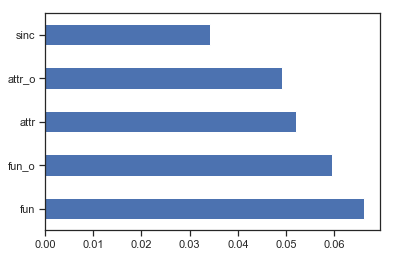

In [241]:
# Next, I also used an extremely randomized trees classifier to select the important
#  features of our dataset.  This python function creates 10 (default number) trees
#  and provides each tree with a unique random sample of the dataset features.  The trees
#  then calculate their own gini index (default) and each come up with the top features.
#  The average result of all these trees is taken to provide the final list of most 
#  useful features.  The 5 most important features are displayed in the bar graph below. 
#  It is important to note that the top 4 features here agree with the top 4 
#  features chosen by the chi-square method above.  The only difference in results is
#  that the chi-square method chose 'sinc' as a top five important feature and 
#  extremely randomized trees chose 'intel-o'.
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

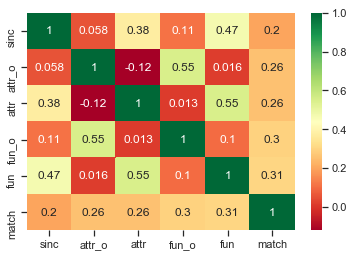

In [242]:
# Next I used a heat map to visualize the correlations between the top 5 most important
#  features (as chosen by the extremely randomized trees classifier) and the target variable.
import seaborn as sns
data = df1[['sinc',
 'attr_o',
 'attr',
 'fun_o','fun','match']]
corrmat = data.corr()
top_corr_features = corrmat.index
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# We can see that the strongest correlations are between 'fun' and 'attr',
#  'fun_o' and 'attr_o', both at .55 .  More importantly, the strongest
#  correlation between match and the one of top five most important variables is 
#  the variable 'fun', with a correlation of .31

In [6]:
# Despite my results from the two feature selection methods, 
#  I decided to keep the remaining variables as predictors
#  as they could potentially add some value.

# In preparation for building models in part 2, I split up our dataset into a training
#  and testing set.  I chose to have 75% of the data in the training set (default value),
#  as including more data in the training set usually leads to stronger, more accurate models.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y, random_state=0)

## Part 2: Predicting Matches

In [270]:
warnings.filterwarnings('ignore')

# For part 2, I built 4 different models: a random forest classifier, a logistic regression,
#  a support vector machine, and a multi-layer perceptron.  My method for constructing each
#  model is as follows:
#  I used the grid search method to pick the best parameters for the relevant model, based
#  on the training set I created above (X/y_train). The GridSearchCV function took my 
#  training set and split it up into 5 different validation sets.  I chose
#  5 as the number of folds as this has been empirically shown to be 
#  a reasonable value that will balance out the variance-bias tradeoff inherent
#  in the cross-validation method.  This 5-fold cross
#  validation procedure built the specified model type 5 times, each time using one of the
#  five validation sets as a test set, and the rest of the 4 validation sets as training
#  sets to fit the model. The performance (weighted f-score, a weighted average
#  of precision and recall) of all these 5 models 
#  was then averaged to give the final weighted f-score of the model. The advantage to using
#  cross-validation over simply having a training and testing set is that there is always
#  a tradeoff between placing points in one of the two sets (overfitting when placing 
#  too many points in the training set and underfitting when placing too many points in 
#  the testing set).  However, with cross validation, each data point has the opportunity
#  to both be in the training and testing set.
#  After running the GridSearchCV function for the specified model type,
#  I could then see the best parameter values for each parameter
#  and the corresponding weighted f-score.  I used these parameter  
#  values to build the actual model, again fit on the training set.   
#  I then predicted target values for my test set (X/y_test) and used these values along
#  with the test set's actual values to compute the weighted f-score.  
#  I chose to use a separate testing set on top of using 
#  cross-validation because sometimes cross-validation may overestimate the performance 
#  of a model due to the nature of its averaging of f-scores, 
#  so using a separate testing set as a way to evaluate the model may 
#  give a better sense of the model's true performace.
#  
#  I used this final weighted f-score to evaluate the model's
#  performance against those of the other model types:



In [257]:
# Random Forest Classifier

# First tune model with grid searching and cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier() 

param_grid = { 
    'n_estimators': [10, 30, 70, 100],
    'max_depth':[10,20,30]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring='f1_weighted')  # be careful about scoring, always match
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'max_depth': 20, 'n_estimators': 100}
0.8111476728325915


In [260]:
# Now use the parameters found above to create the random forest classifier:
from sklearn.metrics import f1_score
rfc = RandomForestClassifier(max_depth=30, n_estimators= 100) 
rfc.fit(X_train, y_train)
result_y = rfc.predict(X_test)
print("f1 score:", f1_score(y_test, result_y, average='weighted'))

f1 score: 0.8455813363258982


In [261]:
# Logistic regression

# First tune model with grid searching and cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression() 

param_grid = { 
    'C': [0.001,0.01,0.1,1,10,100],
    "penalty":["l1","l2"]
}

CV_lg = GridSearchCV(estimator=lg, param_grid=param_grid, cv= 5,scoring='f1_weighted')  # be careful about scoring, always match
CV_lg.fit(X_train, y_train)
print(CV_lg.best_params_)
print(CV_lg.best_score_)

/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dorsamassihpour/anaconda3/lib/python3.7

/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: Futur

{'C': 1, 'penalty': 'l2'}
0.8240895729867201


In [266]:
# Now use the parameters found above to create the logistic regression model
from sklearn.metrics import f1_score
lg = LogisticRegression(C= 1, penalty= 'l2') 
lg.fit(X_train, y_train)
result_y = lg.predict(X_test)
print("f1 score:", f1_score( y_test, result_y, average='weighted'))


f1 score: 0.8274997622544618


/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [267]:
# Lasso Regression - I attempted to run a lasso regression but ran into an error:
#  'ValueError: Classification metrics can't handle a mix of binary and continuous targets'.
#  I then looked into the python documentation and noticed that Lasso() is implemented as 
#  a regression rather than classification model, thus given that our match column is binary
#  and we are trying to solve a classification problem, the Lasso() function from sklearn 
#  could not be used in our case, unless I missed finding the parameter or other model
#  specifications in my online search that would allow this function to work for our problem.

# First tune model with grid searching and cross validation
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso
# lasso = Lasso() 

# param_grid = { 
#     'alpha': [0.001,0.01,0.1,1,10,100]
# }


# CV_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, cv= 5,scoring='f1_weighted')  
# CV_lasso.fit(X_train, y_train)
# print(CV_lasso.best_params_)
# print(CV_lasso.best_score_)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [269]:
# Support Vector Machine

# First tune model with grid searching and cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC() 

param_grid = { 
    'gamma': [0.001, .1, 1, 10], 
    'kernel': ['linear', 'rbf'],
    'C': [0.001, .1, 1, 10] 
}


CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5,scoring='f1_weighted')  # be careful about scoring, always match
CV_svc.fit(X_train, y_train)
print(CV_svc.best_params_)
print(CV_svc.best_score_)


/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dorsamassihpour/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.8224400271506651


In [274]:
# Now use the parameters found above to create the svm
from sklearn.metrics import f1_score
svc = SVC(C=10, gamma= .001, kernel = 'rbf') 
svc.fit(X_train, y_train)
result_y = svc.predict(X_test)
print("f1 score:", f1_score(y_test, result_y, average='weighted'))

f1 score: 0.8406097473307294


In [272]:
# Multi-layer perceptron

# First tune model with grid searching and cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier() 

# param_grid = { 
#     'hidden_layer_sizes': [(100, 100, 100)],
#     'activation':["identity","logistic", "tanh", "relu"],
#     'solver':[‘lbfgs’, ‘sgd’],
#     'alpha':[0.001,0.01,0.1,1,10],
#     'learning_rate':['constant', 'invscaling', 'adaptive']
    
# }

param_grid = { 
    'activation':["identity","logistic"],
    'solver':['lbfgs', 'sgd'],
    'alpha':[0.001,.01,1,10]
}

CV_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid, cv= 5,scoring='f1_weighted')
CV_mlp.fit(X_train, y_train)
print(CV_mlp.best_params_)
print(CV_mlp.best_score_)

{'activation': 'logistic', 'alpha': 10, 'solver': 'lbfgs'}
0.8126767426944168


In [278]:
# Now use the parameters found above to create the perceptron
from sklearn.metrics import f1_score
mlp = MLPClassifier(activation = 'logistic', alpha = 10, solver = 'lbfgs')  
mlp.fit(X_train, y_train)
result_y = mlp.predict(X_test)
print("f1 score:", f1_score(y_test, result_y, average='weighted'))

f1 score: 0.8605495999835904


In [296]:
# Comparing the weighted f-score of all 4 models evaluated on the separate testing set,
#  the multi-layer perceptron had the highest score at abou 0.853, with the random forest 
#  classifier as the second best, with a weighted f-score of about 0.846.  (The higher
#  the f-score, the better the precision and recall of the model, or the higher the
#  proportion of true positives over the combination of true and false positives, and the 
#  proportion of true positives over the combination of true positives and false negatives
#  , respectively.) ***
#  Thus, I chose the multi-layer perceptron as the final model to predict the match column for the
#  'testML.csv' data.  

# *** Citation: 
#   Saxena, Shruti. “Precision vs Recall.” Medium, Towards Data Science, 13 May 2018, 
#     https://towardsdatascience.com/precision-vs-recall-386cf9f89488.

# In order the make predictions in the 'testML.csv' dataset, I had to make a few modifications
#  to the dataset.  First, I replaced all NAN entries with a 0.  This seemed like 
#  a reasonable substitution given that if there should be a high rating/value for one 
#  of the variables, the subject would have most likely seen it as important to answer 
#  rather than leave blank.  Next, I removed the columns that I had removed in the 
#  corresponding 'trainML.csv' dataset: career, field, from, iid, and pid.  I also 
#  removed the 'shar1_1' column, as this column was not present in 'trainML.csv' and thus
#  we could not use it as a predictor in the perceptron model we had built.
#df2 = df2.drop(columns = ["career", "field", 'from', 'iid', 'pid', 'shar1_1'])

# I saved the result of the predictions (numpy array) into a separate csv file and copied
#  the contents to the 'match' column of 'testML.csv'
df2 = df2.fillna(0)
predictions_for_testML_data = mlp.predict(df2.iloc[:, 0:55])

np.savetxt("hw1_predictions_part2.csv", predictions_for_testML_data)

## Part 3: Recommendation Engine

In [3]:
import pandas as pd
from surprise import Dataset
from surprise import Reader

# For part 3, I built and compared 4 different recommendation engines based on
#  different algorithms: KNN with means (K-means), singular vector decomposition,
#  SVD++, and non-negative matrix factorization (NMF). After reading in the data and
#  specifying the proper rating, I used the surprise package's GridSearchCV function 
#  to find the parameters that provided the lowest mean absolute error 
#  for each model.  I supplied
#  the grid search function with a variety of the top 2 or 3 important parameters
#  and again chose k =5 for the same reason as in part 2.
#  The grid search method (as with the corresponding sklearn method used in part 2)
#  divided the dataset into 5 different dataset and ran the model 5 times using 
#  one of the five datasets as the testing set and the four others as a combined training 
#  set each time.  After fitting on that iteration's training set, it then calculated the 
#  mean absolute error (mae), and averaged over all five iterations to give the final 
#  mae outputed by the best_score function.  I then picked the model with the 
#  lowest mae and predicted the 'rate' column for the 'testRec.csv' dataset

In [4]:
# Define the rate
reader = Reader(rating_scale=(1, 10))
# Read data and split into training and test dataset
data = Dataset.load_from_df(df3[["pid", "iid", "rate"]], reader)
from surprise.model_selection import train_test_split
#trainingSet, testingSet = train_test_split(data, test_size = .25)
print(type(data))

<class 'surprise.dataset.DatasetAutoFolds'>


In [8]:
# KNN algorithm

from surprise import KNNWithMeans

algo = KNNWithMeans
#trainingSet = data.build_full_trainset()

from surprise.model_selection import GridSearchCV

param_grid = { 
    'k': [5,10,20,50,100],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False, True]}
}

CV_knn = GridSearchCV(algo_class=algo, param_grid=param_grid, cv= 5, measures=['mae'])
CV_knn.fit(data)
print(CV_knn.best_params)
print(CV_knn.best_score)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd sim

In [8]:
# SVD
from surprise import SVD

# grid search

param_grid = { 
    'n_factors': [10,20,50,100],
    'n_epochs': [20,30],
    #, init_mean :[0,10,100], init_std_dev:[.1,1.10], 
    'lr_all': [.001, .01]
}

algo = SVD

from surprise.model_selection import GridSearchCV

CV_svd = GridSearchCV(algo_class=algo, param_grid=param_grid, cv= 5, measures=['mae']) 
CV_svd.fit(data)
print(CV_svd.best_params)
print(CV_svd.best_score)


{'mae': {'n_factors': 100, 'n_epochs': 30, 'lr_all': 0.01}}
{'mae': 0.08411962739450378}


In [10]:
# SVD++ 
from surprise import SVDpp

# grid search
param_grid = { 
    'n_factors': [10, 50],
    'n_epochs': [20,30], 
    #, init_mean :[0,10,100], init_std_dev:[.1,1.10], 
    'lr_all':[.001, .01]}

from surprise.model_selection import GridSearchCV

CV_svdpp = GridSearchCV(algo_class = SVDpp, param_grid = param_grid, cv = 5, measures=['mae'])
CV_svdpp.fit(data)
print(CV_svdpp.best_params)
print(CV_svdpp.best_score)

{'mae': {'n_factors': 50, 'n_epochs': 30, 'lr_all': 0.01}}
{'mae': 0.07986557908278058}


In [8]:
# NMF
from surprise import NMF

# grid search
from surprise.model_selection import GridSearchCV

param_grid = { 
    'n_factors': [1,10,20, 50,100],
    'n_epochs': [1,10,20,50,100]  
    #, 'reg_pu': [0.001, .06, .1, 1, 10],
    # 'reg_qi': [0.001, .02, .1, 1, 10],
    # 'reg_bu': [0.0001, .001, .1, 1], 10,
    # 'Ir_bi': [0.001, .005, .01, .1, 1, 10],
}

CV_nmf = GridSearchCV(NMF, param_grid=param_grid, measures=['mae'], cv= 5)
CV_nmf.fit(data)
print(CV_nmf.best_params)
print(CV_nmf.best_score)


{'mae': {'n_factors': 20, 'n_epochs': 100}}
{'mae': 0.2556044337057573}


In [45]:
# We can see from the 4 mae scores above that the best model type is the 
# SVD++ estimator, with the lowest mae of about.080.  The parameters that give this mae
#  score are 50 factors, 30 iterations of the SGD procedure, and a learning
#  rate of .01 for all parametersclusters.  I used these parameters to build
#  the final SVD++ model, predicted the 'rate' column for the 'testRec.csv' file 
#  (test function), and saved the results to a separate
#  csv before copying it over to the test file


#Output from above:
#{'mae': {'n_factors': 50, 'n_epochs': 30, 'lr_all': 0.01}}
#{'mae': 0.07986557908278058}

trainingSet = data.build_full_trainset()
my_svdpp = SVDpp(n_factors=50, n_epochs=30, lr_all=0.01)  
my_svdpp.fit(trainingSet)

list_of_predicted_ratings = []
for ind in df4.index:
    curr_elem = my_svdpp.predict(df4['pid'][ind], df4['iid'][ind])
    curr_elem = curr_elem.est
    list_of_predicted_ratings.append(curr_elem)

print("done")

done


In [46]:
list_of_predicted_ratings

[7.306795906132861,
 7.26015102418811,
 6.404723304881439,
 7.197902557273127,
 6.888264416178088,
 6.671771164744209,
 6.7874253050514,
 6.413713141069442,
 6.933589830607236,
 5.514289273647438,
 7.2609403444621154,
 7.24644360158159,
 7.38234053753839,
 7.546837942962609,
 6.661111509846253,
 7.519408621498314,
 7.44422294142253,
 6.705522995976446,
 7.441931221004733,
 7.580922624350682,
 7.7667677674207285,
 6.50299564367317,
 7.379538073137067,
 7.56787311649239,
 7.443511686746054,
 6.168887085996596,
 7.04451056502247,
 7.1550863144138175,
 7.005860807515847,
 6.942826811814195,
 7.2339638049356205,
 7.363680180186612,
 8.293283428622539,
 6.130983620478451,
 6.823356516728424,
 6.933284663087142,
 6.434700342623525,
 6.354236755504785,
 6.833387926859094,
 6.696715630643084,
 7.019437156914437,
 6.954284047746365,
 7.337178121618856,
 7.599175095978007,
 6.92710711290256,
 5.7114884260758485,
 7.368077388580691,
 6.676785280585902,
 7.7997734837340165,
 6.816492914861715,
 7.5

In [47]:
np.savetxt("hw1_predictions_part3.csv", list_of_predicted_ratings)
print("done")

done
